In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [3]:
from sklearn import preprocessing

In [4]:
plt.style.use('seaborn')

### Load Dataset

In [5]:
df_banking = pd.read_csv('./datasets/banking.csv')
df_banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Explore and Visualize Data

In [6]:
df_banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

<AxesSubplot:xlabel='y', ylabel='count'>

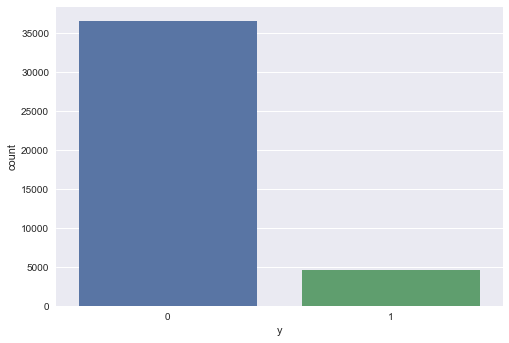

In [7]:
sns.countplot(x='y', data=df_banking)

In [8]:
np.unique(df_banking['job'])

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [9]:
np.unique(df_banking['marital'])

array(['divorced', 'married', 'single', 'unknown'], dtype=object)

In [10]:
np.unique(df_banking['education'])

array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown'],
      dtype=object)

In [11]:
df_banking.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [12]:
df_banking.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


Text(0, 0.5, 'Freq of Purchase Deposito')

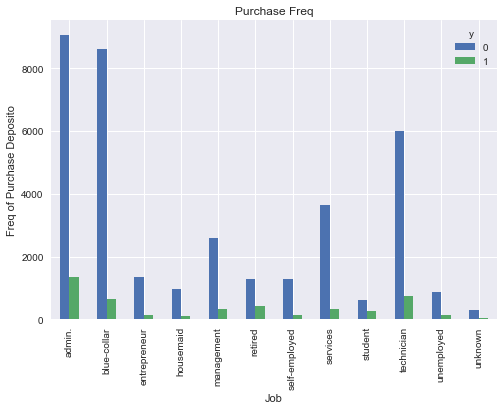

In [13]:
pd.crosstab(df_banking.job, df_banking.y).plot(kind='bar')
plt.title('Purchase Freq')
plt.xlabel('Job')
plt.ylabel('Freq of Purchase Deposito')

Text(0, 0.5, 'Freq of Purchase Deposit')

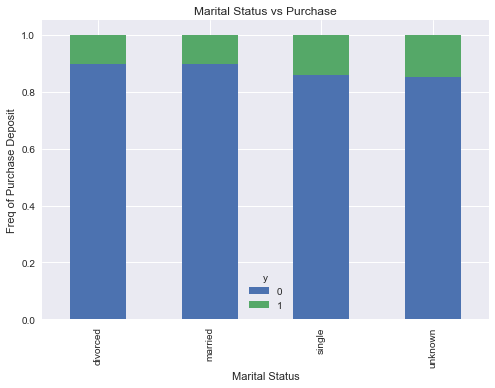

In [16]:
table = pd.crosstab(df_banking.marital, df_banking.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Freq of Purchase Deposit')


Text(0, 0.5, 'Freq of Purchase Deposit')

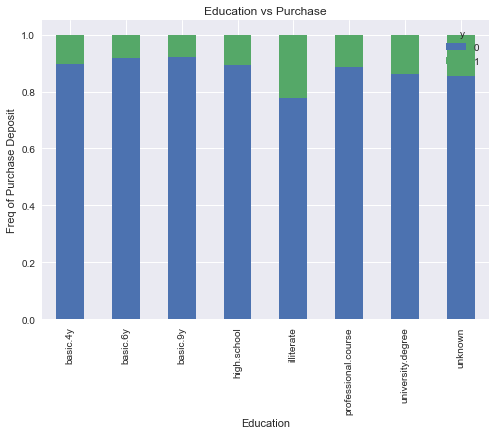

In [17]:
table = pd.crosstab(df_banking.education, df_banking.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Freq of Purchase Deposit')

Text(0, 0.5, 'Freq of Purchase Deposit')

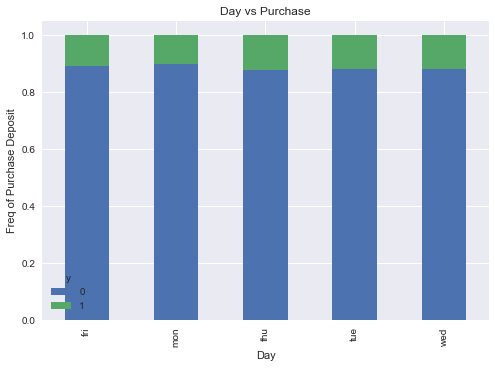

In [18]:
table = pd.crosstab(df_banking.day_of_week, df_banking.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Day vs Purchase')
plt.xlabel('Day')
plt.ylabel('Freq of Purchase Deposit')

<AxesSubplot:>

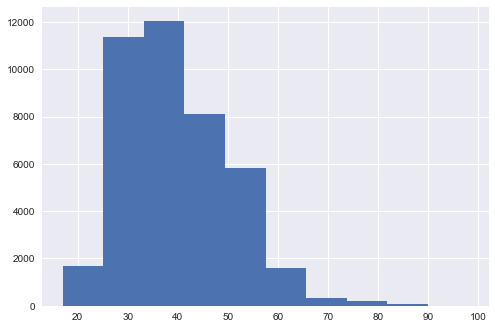

In [19]:
df_banking.age.hist()

## Preprocess Data

In [20]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week', 'poutcome']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(df_banking[var], prefix=var)
    data1= df_banking.join(cat_list)
    df_banking=data1

In [21]:
df_banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,0,1


In [22]:
df_banking.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contac

In [24]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week', 'poutcome']
data_vars = df_banking.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [26]:
df_banking2 = df_banking[to_keep]
df_banking2.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

### Prepare Feature and Label

In [27]:
data_vars = df_banking2.columns.values.tolist()
y= ['y']
X= [i for i in data_vars if i not in y]

### Split Data

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_banking2[X], df_banking2[y], test_size=0.3, random_state=0)

### Normalize

In [33]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

## Data Modelling

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

D:\Users\p6119678\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

### Test Model

In [36]:
model_score = logreg.score(X_test, y_test)

In [37]:
print('Model Accuracy:', model_score)

Model Accuracy: 0.9133284777858703


In [38]:
logreg.coef_

array([[ 8.87990494e-03,  1.21569469e+00, -9.30492507e-02,
        -1.95785190e-01, -3.56282195e-02, -2.62233027e+00,
         1.21257989e+00,  1.08586551e-01,  4.43926947e-01,
         4.21284359e-01,  4.10019913e-02, -7.16961776e-02,
        -2.46313251e-02, -1.34775663e-02,  1.40499232e-02,
         7.43034601e-02, -4.02140138e-02, -1.02310263e-02,
         4.56727538e-02, -4.38400656e-04,  1.83558554e-02,
         1.73220246e-02,  2.04891033e-03, -1.69314841e-02,
         1.69674533e-02,  2.72364733e-04, -2.37958638e-02,
        -1.85594688e-03, -3.60277242e-02, -2.23796041e-03,
         2.37106362e-02,  9.90131395e-03,  3.69647032e-02,
         3.59769279e-03,  6.97913697e-02, -6.91689703e-02,
        -4.33625682e-02,  8.48927993e-03, -1.64241801e-03,
        -7.95635785e-03,  1.03700688e-02, -1.64241801e-03,
        -1.02984840e-02,  1.42896534e-01, -1.42896534e-01,
         4.72943375e-03,  3.01053805e-01,  3.66458457e-04,
         6.19987230e-02, -1.35579403e-01,  2.19909849e-0

In [39]:
logreg.intercept_

array([-3.10760565])

### Visualize S-Curve

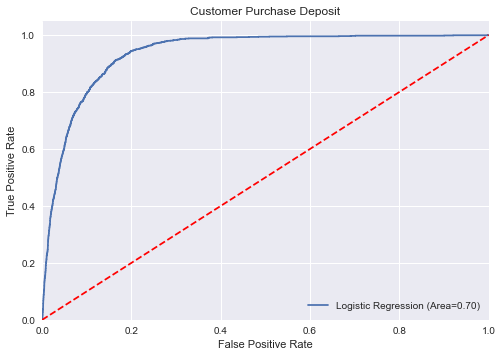

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, threshols = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='Logistic Regression (Area=%0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Customer Purchase Deposit')
plt.legend(loc="lower right")
plt.show()